In [226]:
import pandas as pd
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv('./fast_model_weight_performance.csv', sep=',')

In [228]:
df

,confidence,layer,dropout,output
0,0.862415,1,0,bee
1,0.660513,1,5,bee
2,0.460248,1,10,bee
3,0.171593,1,15,bee
4,0.057175,1,20,bee
5,0.115913,1,25,bee
6,0.001091,1,30,bee
7,0.005045,1,35,bee
8,0.000423,1,40,bee
9,0.000389,1,45,bee


    dropout
0         0
1         5
2        10
3        15
4        20
5        25
6        30
7        35
8        40
9        45
10       50
11       55
12       60
13       65
14       70
15       75
16       80
17       85
18       90
19       95
20      100
   index   Layer 1
0      0  0.862415
1      1  0.660513
2      2  0.460248
3      3  0.171593
4      4  0.057175
5      5  0.115913
6      6  0.001091
7      7  0.005045
8      8  0.000423
9      9  0.000389
10    10  0.002743
11    11  0.000139
12    12  0.003267
13    13  0.000904
14    14  0.000147
15    15  0.000100
16    16  0.000377
17    17  0.000197
18    18  0.000275
19    19  0.000304
20    20  0.000965
   index       Layer 2
0     21  8.624150e-01
1     22  6.116570e-01
2     23  8.531990e-01
3     24  5.419840e-01
4     25  7.112760e-01
5     26  5.955960e-01
6     27  2.766180e-01
7     28  3.435360e-01
8     29  1.636190e-01
9     30  4.628110e-01
10    31  1.499550e-01
11    32  9.506500e-02
12    33  1.367250e

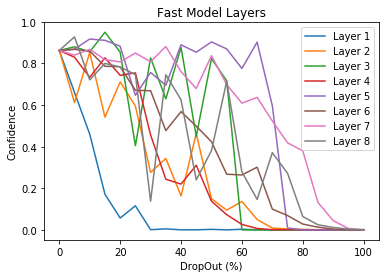

In [235]:
NUM_LAYERS = 8
DATA_PER_LAYER = 21
dropout_column = df.dropout.iloc[0:DATA_PER_LAYER]
new_df = pd.DataFrame(dropout_column)
print(new_df)
all_confidences = []
for layer in range(1, NUM_LAYERS + 1):
    df_layer = df.iloc[(layer - 1) * DATA_PER_LAYER : layer * DATA_PER_LAYER, :]
    df_layer_filtered = df_layer[df_layer.output.str.contains("bee")]
    df_layer_to_plot = df_layer_filtered[['confidence', 'dropout']].copy()
    df_layer_to_plot = df_layer_to_plot.rename(index=str, columns={"confidence": ("Layer " + str(layer))})
    df_layer_to_plot = df_layer_to_plot.drop(columns='dropout').reset_index()
    print(df_layer_to_plot)
    all_confidences.append(df_layer_to_plot.iloc[:,1])

confidence_df = pd.concat(all_confidences, axis=1, sort=False, ignore_index=False)
confidence_df['dropout'] = dropout_column
confidence_df

# plotting
fig = confidence_df.plot(x='dropout', y=['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6', 'Layer 7', 'Layer 8'], title=("Fast Model Layers"))
fig.set_xlabel('DropOut (%)')
fig.set_ylabel('Confidence');
figure = fig.get_figure()
figure.savefig(fname=("./plots/fast_model.png"))

    dropout
0         0
1         5
2        10
3        15
4        20
5        25
6        30
7        35
8        40
9        45
10       50
11       55
12       60
13       65
14       70
15       75
16       80
17       85
18       90
19       95
20      100
   index   Layer 1
0      0  0.984750
1      1  0.965874
2      2  0.425728
3      3  0.371192
4      4  0.012753
5      5  0.003134
6      6  0.059686
7      7  0.000013
8      8  0.000480
9      9  0.001831
10    10  0.000039
11    11  0.000175
12    12  0.000366
13    13  0.000224
14    14  0.000108
15    15  0.000054
16    16  0.000519
17    17  0.000130
18    18  0.000080
19    19  0.000437
20    20  0.000001
   index   Layer 2
0     21  0.984750
1     22  0.987848
2     23  0.971424
3     24  0.865498
4     25  0.997351
5     26  0.925271
6     27  0.751082
7     28  0.915346
8     29  0.637198
9     30  0.034025
10    31  0.881894
11    32  0.010138
12    33  0.731380
13    34  0.618645
14    35  0.265372
15    36  0.00

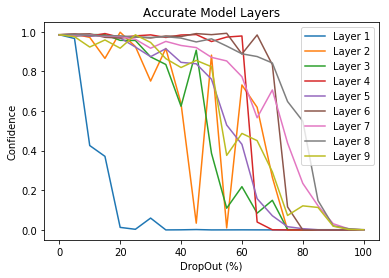

In [238]:
df = pd.read_csv('./accurate_model_weight_performance.csv', sep=',')

NUM_LAYERS = 9
DATA_PER_LAYER = 21
dropout_column = df.dropout.iloc[0:DATA_PER_LAYER]
new_df = pd.DataFrame(dropout_column)
print(new_df)
all_confidences = []
for layer in range(1, NUM_LAYERS + 1):
    df_layer = df.iloc[(layer - 1) * DATA_PER_LAYER : layer * DATA_PER_LAYER, :]
    df_layer_filtered = df_layer[df_layer.output.str.contains("bee")]
    df_layer_to_plot = df_layer_filtered[['confidence', 'dropout']].copy()
    df_layer_to_plot = df_layer_to_plot.rename(index=str, columns={"confidence": ("Layer " + str(layer))})
    df_layer_to_plot = df_layer_to_plot.drop(columns='dropout').reset_index()
    print(df_layer_to_plot)
    all_confidences.append(df_layer_to_plot.iloc[:,1])

confidence_df = pd.concat(all_confidences, axis=1, sort=False, ignore_index=False)
confidence_df['dropout'] = dropout_column
confidence_df

# plotting
fig = confidence_df.plot(x='dropout', y=['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6', 'Layer 7', 'Layer 8', 'Layer 9'], title=("Accurate Model Layers"))
fig.set_xlabel('DropOut (%)')
fig.set_ylabel('Confidence');
figure = fig.get_figure()
figure.savefig(fname=("./plots/fast_model.png"))